# import

In [0]:
!pip install keras-bert
!pip install keras-radam

  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=74b9386fc3206b4c5ecbce61bcb97b0378a8665612eeee6b09179e3192abeb03
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f98bc7c992e3a2d899edb2d22ef9e
  Created wheel for keras-transformer: filename=keras_transformer-0.32.0-cp36-none-any.whl size=13266 sha256=e4e408bbdde834d9a33812bfae1446529bd298af89d731bacc3b38e560f9e42f
  Stored in directory: /root/.cache/pip/wheels/62/f0/ce/82fa5d024d5ef8e263f26a50dcee23820efe245680ce9c922a
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7554 sha256=add3fce6975183da5f4bc60391d805ac15ff4ebf473350c6673ee70cdec0d9d3
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=17c7490d27076224cd3b0c12f8dc0c411b73fbdf1299265332b4113c06639ade
  Stor

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [0]:
path = '/content/drive/My Drive'

In [0]:
# wget을 활용해서 bert 모델 다운로드 가능
import os
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

import zipfile
import shutil
         
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')
 
bert_zip.close()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree("bert/multi_cased_L-12_H-768_A-12", "bert")

--2020-04-22 06:56:59--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip’

multi_cased_L-12_H- 100%[===================>] 632.19M  79.9MB/s    in 7.7s    

2020-04-22 06:57:07 (82.0 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip’ saved [662903077/662903077]



In [0]:
os.listdir('bert')

['multi_cased_L-12_H-768_A-12',
 'bert_model.ckpt.meta',
 'bert_model.ckpt.data-00000-of-00001',
 'vocab.txt',
 'bert_model.ckpt.index',
 'bert_config.json']

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers
from keras.utils import to_categorical
from keras.utils import model_to_dot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

import codecs
from tqdm import tqdm
import shutil

from IPython.display import SVG

import time


TensorFlow 1.x selected.


Using TensorFlow backend.


# 데이터 로드 및 처리

In [0]:
df = pd.read_csv('/content/drive/My Drive/[핀테크 과정] 머신러닝 팀플/딥러닝/glowpick_end.csv')
df.head()

product  ...                                              index
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [753, 7, 75, 40, 234, 1561, 361, 370, 60, 714,...
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [39, 18, 491, 228, 173, 42, 36, 7, 531, 686, 5...
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...       [44, 46, 144, 51, 163, 4856, 127, 188, 1142]
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [937, 145, 78, 44, 46, 144, 424, 108, 3, 1237,...
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [27, 41, 184, 1, 186, 288, 110, 998, 44, 46, 1...

[5 rows x 12 columns]

In [0]:
#############긍/부정 mapping
# 1:긍정, 0:부정
rating_mapping = {5:1, 4:1, 3:0, 2:0, 1:0} 
df['label'] = df['rating'].map(rating_mapping)

In [0]:
df.head()

product  ... label
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1

[5 rows x 13 columns]

In [0]:
#to_categorical 함수는 max값으로 카테고리 몇개있는지 인식하고 0부터 인식하기 때문에, 1~5있으면 6개 category있는 걸로 오해함.
#df['label'] = df['rating']-1

In [0]:
df.dropna(axis=0, how='any',inplace=True)

In [0]:
df.head()

product  ... label
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     1

[5 rows x 13 columns]

In [0]:
y = df['label']
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.25, random_state=99, shuffle=True, stratify=y_train)

In [0]:
SEQ_LEN = 256

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "pre_review"
LABEL_COLUMN = "label"

In [0]:
def convert_data(data_x, data_y):
    # make indices
    col_index = data_x.columns.get_loc("index")
    indices=[]

    for i in range(len(data_x)):
      a = data_x.iloc[i, col_index]
      b = a.strip('[]')
      c = b.split(',')
      blank_list = []
      for j in range(SEQ_LEN):
        try:
            num = float(c[j])
        except:
            num=0
        blank_list.append(num)
      indices.append(blank_list)
        
    print(indices)
    targets = data_y
    items = list(zip(indices, targets))
    indices, targets = zip(*items)
    targets = to_categorical(targets,2)  # 이부분 개수 ㅠ
    indices = np.asarray(indices)
    
    return [indices, np.zeros_like(indices)], np.array(targets)

- 사전학습된 버트 모델의 인풋은 문장 토큰화가 숫자로 바뀐 것과, 앞문장인지 뒷문장인지 알려주는 문장 순서 벡터가 들어갑니다. 우리는 문장 하나를 가지고만 훈련할 것이므로 순서 벡터는 모두 0으로 통일합니다.

- 그리고 파인튜닝 시에는 문장 안에 일부 단어를 가리는 마스킹은 사용하지 않습니다.

In [0]:
train_x, train_y = convert_data(X_train, y_train)
val_x, val_y = convert_data(X_val, y_val)
test_x, test_y = convert_data(X_test, y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
train_x

[array([[  48.,  160.,   59., ...,    0.,    0.,    0.],
        [ 349.,  166.,  388., ...,    0.,    0.,    0.],
        [ 126.,  715.,   21., ...,    0.,    0.,    0.],
        ...,
        [1195.,   74., 1301., ...,    0.,    0.,    0.],
        [2480., 1719.,  105., ...,    0.,    0.,    0.],
        [  66., 1005., 1362., ...,    0.,    0.,    0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [0]:
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
train_y.shape

(32154, 2)

# 모델 로드 및 설정

In [0]:
############### 레이어 개수 설정 + 사전훈련된 모델 로드 ################
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)

모델의 구조를 확인합니다.  
총 12층의 트랜스포머 계층이 있음을 확인할 수 있습니다.


In [0]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 256)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 256)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 256, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 256, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [0]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(2, activation='softmax',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),  ## 2로 바꿔줌
                              name = 'real_output')(dense)

  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  
  return bert_model

**모델의 FLOW를 확인해 보도록 하겠습니다.**

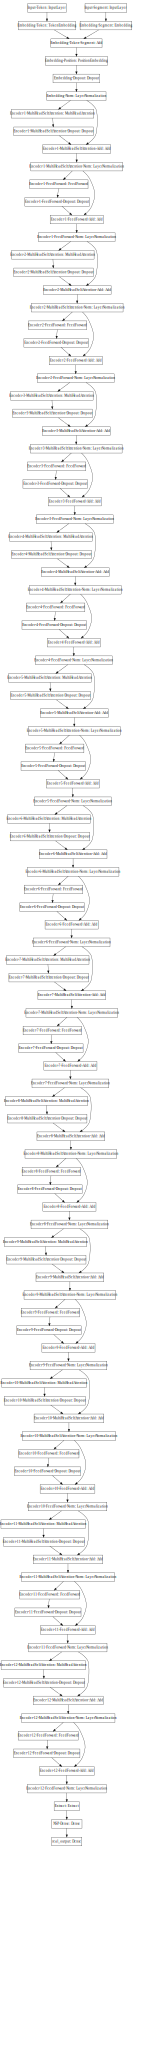

In [0]:
SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))

# 1) epoch =5

In [0]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=5, batch_size=8, verbose = 1, validation_data=(val_x, val_y), shuffle=True)
'''
123 / 45 [긍정부정]
epochs=5
seq_len = 256
batch_size=8
learning rate = 0.00001
optimizer=radam
'''

Train on 32154 samples, validate on 10718 samples
Epoch 1/5
32154/32154 [==============================] - 4618s 144ms/step - loss: 0.5493 - accuracy: 0.7401 - val_loss: 0.4518 - val_accuracy: 0.7902
Epoch 2/5
32154/32154 [==============================] - 4607s 143ms/step - loss: 0.4275 - accuracy: 0.8092 - val_loss: 0.4183 - val_accuracy: 0.8099
Epoch 3/5
32154/32154 [==============================] - 4607s 143ms/step - loss: 0.3542 - accuracy: 0.8490 - val_loss: 0.4290 - val_accuracy: 0.8175
Epoch 4/5
32154/32154 [==============================] - 4605s 143ms/step - loss: 0.2672 - accuracy: 0.8925 - val_loss: 0.4779 - val_accuracy: 0.8152
Epoch 5/5
32154/32154 [==============================] - 4604s 143ms/step - loss: 0.1848 - accuracy: 0.9304 - val_loss: 0.5163 - val_accuracy: 0.8137


'\n123 / 45 [긍정부정]\nepochs=5\nseq_len = 256\nbatch_size=8\nlearning rate = 0.00001\noptimizer=radam\n'

In [0]:
bert_model.save_weights(path+"/bert_pn_epoch5_batch8.h5")

In [0]:
os.listdir(path)

['multi_cased_L-12_H-768_A-12.zip',
 'Untitled',
 'glowpick_end.csv',
 'bert',
 '[ㅎㅎ2][상은][긍부정123_45]BERTMODEL.ipynb',
 'bert_pn_epoch5_batch8.h5']

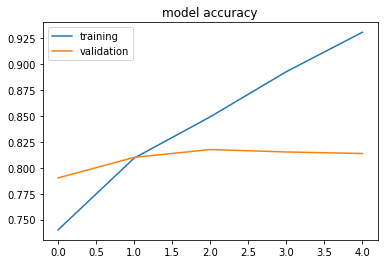

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model accuracy')
plt.show()

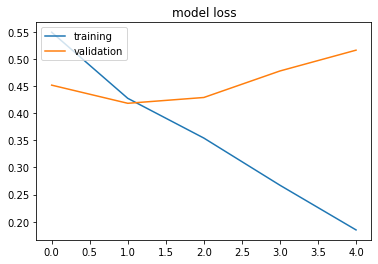

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model loss')
plt.show()

In [0]:
#예측
preds = bert_model.predict(test_x)

In [0]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.00584259, 0.99415743],
       [0.85713035, 0.14286967],
       [0.93034744, 0.0696525 ],
       ...,
       [0.00600413, 0.9939959 ],
       [0.67784846, 0.32215154],
       [0.00582676, 0.9941732 ]], dtype=float32)

In [0]:
preds_list = []
for i in range(0, len(preds)):
  preds_list.append([np.where(preds[i] == a) for a in preds[i] if a == max(preds[i])][0][0][0]) 

In [0]:
preds_list

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [0]:
y_true = test_y
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61      2950
           1       0.84      0.91      0.88      7768

   micro avg       0.81      0.81      0.81     10718
   macro avg       0.77      0.73      0.74     10718
weighted avg       0.80      0.81      0.80     10718
 samples avg       0.81      0.81      0.81     10718



In [0]:
results = bert_model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])

10718/10718 [==============================] - 344s 32ms/step
Test accuracy:  0.8121851086616516


# 2) epoch = 3

In [0]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=3, batch_size=8, verbose = 1, validation_data=(val_x, val_y), shuffle=True)
'''
123 / 45 [긍정부정]
epochs=3
seq_len = 256
batch_size=8
learning rate = 0.00001
optimizer=radam
'''

Train on 32154 samples, validate on 10718 samples
Epoch 1/3
32154/32154 [==============================] - 1464s 46ms/step - loss: 0.5703 - accuracy: 0.7303 - val_loss: 0.6165 - val_accuracy: 0.7398
Epoch 2/3
32154/32154 [==============================] - 1450s 45ms/step - loss: 0.4543 - accuracy: 0.7918 - val_loss: 0.4533 - val_accuracy: 0.8065
Epoch 3/3
32154/32154 [==============================] - 1446s 45ms/step - loss: 0.3873 - accuracy: 0.8285 - val_loss: 0.4231 - val_accuracy: 0.8109


'\n123 / 45 [긍정부정]\nepochs=3\nseq_len = 256\nbatch_size=8\nlearning rate = 0.00001\noptimizer=radam\n'

In [0]:
bert_model.save_weights(path+"/bert_pn_epoch3_batch8.h5")

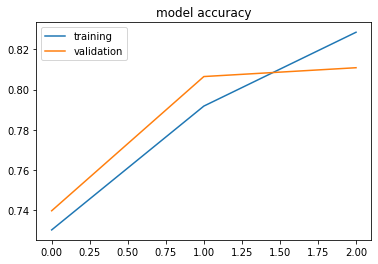

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model accuracy')
plt.show()

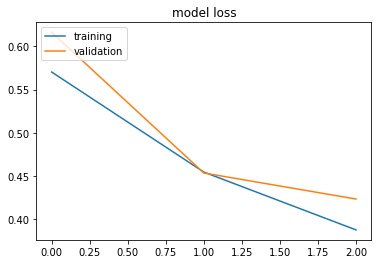

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model loss')
plt.show()

In [0]:
#예측
preds = bert_model.predict(test_x)

In [0]:
preds

array([[0.06301826, 0.93698174],
       [0.78329253, 0.21670747],
       [0.6699356 , 0.33006445],
       ...,
       [0.11304568, 0.8869543 ],
       [0.5392885 , 0.46071145],
       [0.03910476, 0.96089524]], dtype=float32)

In [0]:
preds_list = []
for i in range(0, len(preds)):
  preds_list.append([np.where(preds[i] == a) for a in preds[i] if a == max(preds[i])][0][0][0]) 

In [0]:
preds_list

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [0]:
y_true = test_y
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      2950
           1       0.86      0.89      0.87      7768

   micro avg       0.81      0.81      0.81     10718
   macro avg       0.77      0.75      0.76     10718
weighted avg       0.81      0.81      0.81     10718
 samples avg       0.81      0.81      0.81     10718



In [0]:
results = bert_model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])

10718/10718 [==============================] - 100s 9ms/step
Test accuracy:  0.8139578104019165


# t-SNE visualization (epoch = 5)
#### 마지막 768개의 피처 부분을 잘라내서, 긍정 평가와 부정 평가의  플롯을 한번 그려보고 상호간 기하학적 관계를 살펴보도록 하겠습니다.

#### 먼저, 마지막 768개 피처를 추출하는 함수를 정의합니다
#### 이번에는 아웃풋이 0과 1 사이의 값이 아닌, 768개의 값을 반환하게 됩니다.

In [0]:
bert_model = get_bert_finetuning_model(model)
bert_model.load_weights(path+"/bert_pn_epoch5_batch8.h5")

In [0]:
def get_feature_map(model):
  inputs = model.input
  outputs = model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [0]:
bert_feature = get_feature_map(bert_model)

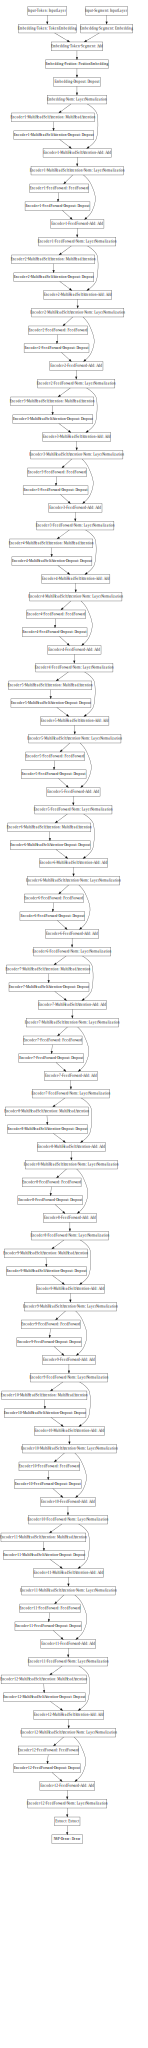

In [0]:
SVG(model_to_dot(bert_feature, dpi=65).create(prog='dot', format='svg'))

마지막 부분을 보시면 768개의 피처가 반환되게 됩니다.

테스트 데이터의 피처들을 반환하고, TSNE 임베딩 플롯을 그려보도록 하겠습니다.

In [0]:
bert_weight_list = bert_feature.predict(test_x)

In [0]:
bert_weight_list

array([[-0.4716821 , -0.05696538,  0.10603281, ...,  0.56909764,
        -0.4752684 ,  0.24982227],
       [ 0.4167568 , -0.04622469,  0.14961441, ..., -0.5297026 ,
         0.41066036,  0.00433255],
       [ 0.4920621 , -0.088365  ,  0.18422082, ..., -0.6230053 ,
         0.58249116, -0.04370938],
       ...,
       [-0.48216504, -0.07123122,  0.12325784, ...,  0.5999659 ,
        -0.4671523 ,  0.22598284],
       [ 0.29088107, -0.05024145,  0.10231098, ..., -0.4190395 ,
         0.33858174,  0.05640003],
       [-0.47178212, -0.09904603,  0.13778517, ...,  0.57497436,
        -0.46567473,  0.25666693]], dtype=float32)

마지막 768 차원을 PCA를 사용하여 256차원으로 줄여줍니다.
그 다음 TSNE 알고리즘을 활용하여 3차원으로 축소해 줍니다.
TSNE 알고리즘은 유사한 것끼리 클러스터를 만들어 주는 역할을 합니다.

In [0]:
bert_embedded = PCA(n_components=256).fit_transform(bert_weight_list)
bert_embedded = TSNE(n_components=3).fit_transform(bert_embedded)
bert_embedded

array([[ -9.2338   ,   6.614687 ,   6.307957 ],
       [  2.269535 , -16.742338 ,   1.750534 ],
       [  1.0134017, -18.053766 ,  -3.479507 ],
       ...,
       [ -5.687456 ,   7.1528697,   9.075004 ],
       [ -4.883142 , -10.6557865,   8.208444 ],
       [ -8.412087 ,   6.8368564,  10.709559 ]], dtype=float32)

bert 임베딩을 pickle 모듈을 활용하여 저장해 줍니다.  

추후 재사용에 쓸 예정입니다.

In [0]:
with open(path+"/bertembedding.pkl", "wb") as f:
  pickle.dump(bert_embedded, f)

저장하였던 임베딩 파일을 로드합니다.

In [0]:
with open(path+"/bertembedding.pkl", "rb") as f:
  bert_embedded = pickle.load(f)

3D로 그리기 위해 matplotlib 모듈들을 로드합니다.

In [0]:
y_test

33781    1
26792    1
46639    0
17702    1
10969    1
        ..
8111     0
40816    0
11505    1
9198     0
8087     1
Name: label, Length: 10718, dtype: int64

In [0]:
def get_tsne_plot(rot1=-20, rot2=100):
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig)
  colors = 'b', 'r'
  labels = 0, 1
  for i, c, label in zip(range(np.shape(bert_embedded)[0]), colors, labels):
    ax.scatter(bert_embedded[y_test==label,0], bert_embedded[y_test==label,1], bert_embedded[y_test==label,2], s=2, c=c, alpha=0.5)
  ax.view_init(rot1, rot2)
  print("rot1:%d" % rot1, "rot2:%d" % rot2)
  plt.legend(labels, loc='upper right')
  plt.show()

긍정(1)과 부정(0)의 임베딩이 잘 되는지 확인해 봅니다.  

긍정 부분의 클러스터와 부정구간의 클러스터가 잘 구분되는 것을 확인하실 수 있습니다.

In [0]:
import time
for j in range(-180, 180, 45):
  for i in range(-180,180,45):
  
    get_tsne_plot(i, j)


Output hidden; open in https://colab.research.google.com to view.

한번 문장을 입력하면 긍정인지 부정인지 알려주는 함수를 만들어 볼까요?

In [0]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    ids, segments = tokenizer.encode(data, max_len=SEQ_LEN)
    indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def movie_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = bert_model.predict(data_x)
    print(predict)
    #predict_answer = np.round(np.ravel(predict), 0).item()
    
    if predict_answer == 0:
      print("부정적인 평가입니다.")
    elif predict_answer == 1:
      print("긍정적인 평가입니다.")

In [0]:
movie_evaluation_predict("너무잼있어엉 진짜 연기가 예술이고 다시보고싶은영화")

긍정적인 영화 평가입니다.


# t-SNE visualization (epoch = 3)
#### 마지막 768개의 피처 부분을 잘라내서, 긍정 평가와 부정 평가의  플롯을 한번 그려보고 상호간 기하학적 관계를 살펴보도록 하겠습니다.

#### 먼저, 마지막 768개 피처를 추출하는 함수를 정의합니다
#### 이번에는 아웃풋이 0과 1 사이의 값이 아닌, 768개의 값을 반환하게 됩니다.

In [0]:
bert_model = get_bert_finetuning_model(model)
bert_model.load_weights(path+"/bert_pn_epoch3_batch8.h5")

In [0]:
def get_feature_map(model):
  inputs = model.input
  outputs = model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [0]:
bert_feature = get_feature_map(bert_model)

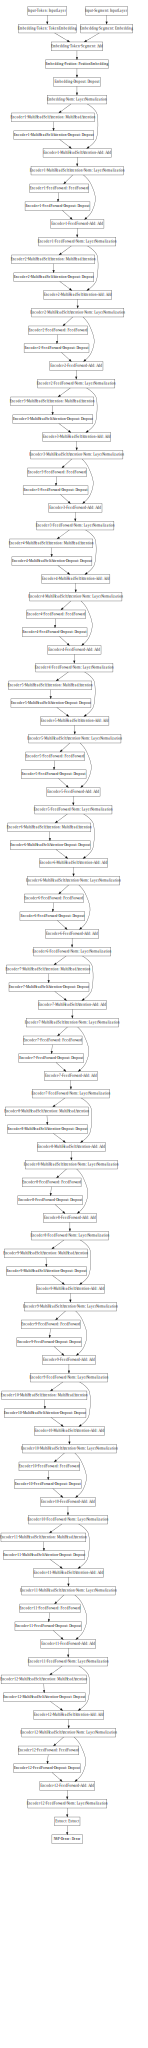

In [0]:
SVG(model_to_dot(bert_feature, dpi=65).create(prog='dot', format='svg'))

마지막 부분을 보시면 768개의 피처가 반환되게 됩니다.

테스트 데이터의 피처들을 반환하고, TSNE 임베딩 플롯을 그려보도록 하겠습니다.

In [0]:
bert_weight_list = bert_feature.predict(test_x)

In [0]:
bert_weight_list

array([[-0.5148084 ,  0.3097121 ,  0.31633684, ...,  0.02971043,
        -0.20217928, -0.38916105],
       [-0.32775757, -0.25408936, -0.3026422 , ..., -0.5111398 ,
         0.17331228,  0.053171  ],
       [-0.70130736,  0.21913196, -0.43443784, ..., -0.18077746,
         0.01243711, -0.17105141],
       ...,
       [-0.60521156,  0.24531105,  0.08382065, ...,  0.07258367,
        -0.23354149, -0.39679164],
       [-0.4454788 ,  0.07905015, -0.28195736, ..., -0.44249454,
        -0.0921458 ,  0.069197  ],
       [-0.24296841,  0.12234347,  0.46460196, ...,  0.06604505,
        -0.3358467 , -0.38102508]], dtype=float32)

마지막 768 차원을 PCA를 사용하여 256차원으로 줄여줍니다.
그 다음 TSNE 알고리즘을 활용하여 3차원으로 축소해 줍니다.
TSNE 알고리즘은 유사한 것끼리 클러스터를 만들어 주는 역할을 합니다.

In [0]:
bert_embedded = PCA(n_components=256).fit_transform(bert_weight_list)
bert_embedded = TSNE(n_components=3).fit_transform(bert_embedded)
bert_embedded

array([[-10.670057  ,   4.9576674 ,  -9.776172  ],
       [ 23.009289  ,   0.11446154,  -3.7575102 ],
       [ 18.35435   ,  -3.0595834 ,  15.262964  ],
       ...,
       [-10.750386  ,   5.9699926 ,  -0.8577325 ],
       [ 16.530577  ,   2.8055093 ,  -1.1543028 ],
       [ -8.752357  ,   0.38593334, -18.498672  ]], dtype=float32)

bert 임베딩을 pickle 모듈을 활용하여 저장해 줍니다.  

추후 재사용에 쓸 예정입니다.

In [0]:
with open(path+"/bertembedding3.pkl", "wb") as f:
  pickle.dump(bert_embedded, f)

저장하였던 임베딩 파일을 로드합니다.

In [0]:
with open(path+"/bertembedding3.pkl", "rb") as f:
  bert_embedded = pickle.load(f)

3D로 그리기 위해 matplotlib 모듈들을 로드합니다.

In [0]:
y_test

33781    1
26792    1
46639    0
17702    1
10969    1
        ..
8111     0
40816    0
11505    1
9198     0
8087     1
Name: label, Length: 10718, dtype: int64

In [0]:
def get_tsne_plot(rot1=-20, rot2=100):
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig)
  colors = 'b', 'r'
  labels = 0, 1
  for i, c, label in zip(range(np.shape(bert_embedded)[0]), colors, labels):
    ax.scatter(bert_embedded[y_test==label,0], bert_embedded[y_test==label,1], bert_embedded[y_test==label,2], s=2, c=c, alpha=0.5)
  ax.view_init(rot1, rot2)
  print("rot1:%d" % rot1, "rot2:%d" % rot2)
  plt.legend(labels, loc='upper right')
  plt.show()

긍정(1)과 부정(0)의 임베딩이 잘 되는지 확인해 봅니다.  

긍정 부분의 클러스터와 부정구간의 클러스터가 잘 구분되는 것을 확인하실 수 있습니다.

In [0]:
import time
for j in range(-180, 180, 45):
  for i in range(-180,180,45):
  
    get_tsne_plot(i, j)


Output hidden; open in https://colab.research.google.com to view.

한번 문장을 입력하면 긍정인지 부정인지 알려주는 함수를 만들어 볼까요?

In [0]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    ids, segments = tokenizer.encode(data, max_len=SEQ_LEN)
    indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def movie_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = bert_model.predict(data_x)
    print(predict)
    #predict_answer = np.round(np.ravel(predict), 0).item()
    
    if predict_answer == 0:
      print("부정적인 평가입니다.")
    elif predict_answer == 1:
      print("긍정적인 평가입니다.")

In [0]:
movie_evaluation_predict("너무잼있어엉 진짜 연기가 예술이고 다시보고싶은영화")

긍정적인 영화 평가입니다.
